In [1227]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)
library(reshape2)
library(dplyr)
library(tidyr)
library(tidyverse)

Cargar los datos en un dataframe llamado: airbnb

In [1228]:
airbnb<-read.csv('data//airbnb.csv',sep = ',', stringsAsFactors = T)

Mostrar las primeras 6 filas del dataframe

In [1229]:
head(airbnb, 6)


,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [1230]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

colnames(airbnb)<-newnames



Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [1231]:
airbnb%>% mutate(MetrosCuadrados=PiesCuadrados * 0.092903)->airbnb


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [1232]:


vacio <- airbnb$CodigoPostal=='' 
dosN <- airbnb$CodigoPostal=='28'
guion <- airbnb$CodigoPostal=='-'
wrong<- airbnb$CodigoPostal=='2015'
wrong1<-airbnb$CodigoPostal == "20013"
wrong2<-airbnb$CodigoPostal == "20126"
wrong3<-airbnb$CodigoPostal == "2015"
wrong4<-airbnb$CodigoPostal == "25008"
wrong5<-airbnb$CodigoPostal == "27004"
wrong6<-airbnb$CodigoPostal == "27013"


fix1<- airbnb$CodigoPostal=='28002\n28002'
fix2<- airbnb$CodigoPostal=='28051\n28051'
fix3<- airbnb$CodigoPostal=='Madrid 28004'
fix3b<- airbnb$CodigoPostal=='2804'
add1<- airbnb$CodigoPostal=='2805'
add3<- airbnb$CodigoPostal=='2815'
add3b<- airbnb$CodigoPostal=='2015'
largo<- airbnb$CodigoPostal=='280013'

airbnb$CodigoPostal[vacio|dosN|guion|wrong|wrong1|wrong2|wrong3|wrong4|wrong5|wrong6] <- NA
airbnb$CodigoPostal[fix1] <- 28002
airbnb$CodigoPostal[fix2] <- 28051
airbnb$CodigoPostal[fix3|fix3b] <- 28004
airbnb$CodigoPostal[add1] <- 28005
airbnb$CodigoPostal[add3|add3b] <- 28015
airbnb$CodigoPostal[add1] <- 28005
airbnb$CodigoPostal[largo]<-28013


length(unique(airbnb$CodigoPostal))


[1] 62

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [1233]:
levels(droplevels(airbnb$CodigoPostal))


[1] "28001" "28002" "28003" "28004" "28005" "28006" "28007" "28008" "28009"
[10] "28010" "28011" "28012" "28013" "28014" "28015" "28016" "28017" "28018"
[19] "28019" "28020" "28021" "28022" "28023" "28024" "28025" "28026" "28027"
[28] "28028" "28029" "28030" "28031" "28032" "28033" "28034" "28035" "28036"
[37] "28037" "28038" "28039" "28040" "28041" "28042" "28043" "28044" "28045"
[46] "28046" "28047" "28048" "28049" "28050" "28051" "28052" "28053" "28054"
[55] "28055" "28056" "28058" "28060" "28094" "28105" "28850"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [1234]:
sorted<- count(airbnb,CodigoPostal,sort=TRUE)
head(sorted,5)
tail(sorted,5)

,CodigoPostal,n
,<fct>,<int>
1,28012,2060
2,28004,1796
3,28005,1195
4,28013,1020
5,28014,630


,CodigoPostal,n
,<fct>,<int>
58,28058,1
59,28060,1
60,28094,1
61,28105,1
62,28850,1


¿Cuales son los barrios que hay en el código postal 28012?

In [1235]:
select<- airbnb %>%filter(CodigoPostal=='28012')
levels(droplevels(na.omit(unique(select$Barrio))))




[1] "Acacias"         "Arapiles"        "Atocha"          "Cortes"         
 [5] "Delicias"        "Embajadores"     "Goya"            "Palacio"        
 [9] "Palos de Moguer" "Sol"             "Universidad"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

In [1236]:
count(select,Barrio)





Barrio,n
<fct>,<int>
Acacias,13
Arapiles,1
Atocha,1
Cortes,216
Delicias,1
Embajadores,1449
Goya,1
Palacio,27
Palos de Moguer,46


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [1237]:
paste('hay ',length(unique(airbnb$Barrio)), 'barrios')

'Estos son:'
levels(droplevels(unique(airbnb$Barrio)))


[1] "hay  125 barrios"

[1] "Estos son:"

[1] "Abrantes"                     "Acacias"                     
  [3] "Adelfas"                      "Aeropuerto"                  
  [5] "Aguilas"                      "Alameda de Osuna"            
  [7] "Almagro"                      "Almenara"                    
  [9] "Almendrales"                  "Aluche"                      
 [11] "Ambroz"                       "Amposta"                     
 [13] "Apostol Santiago"             "Arapiles"                    
 [15] "Aravaca"                      "Arcos"                       
 [17] "Argüelles"                    "Atocha"                      
 [19] "Bellas Vistas"                "Berruguete"                  
 [21] "Buenavista"                   "Butarque"                    
 [23] "Campamento"                   "Canillas"                    
 [25] "Canillejas"                   "Cármenes"                    
 [27] "Casa de Campo"                "Casco Histórico de Barajas"  
 [29] "Casco Histórico de Vallecas"  "Casco Histórico de Vicálvaro"
 [31] "Castellana"                   "Castilla"                    
 [33] "Castillejos"                  "Chopera"                     
 [35] "Ciudad Jardín"                "Ciudad Universitaria"        
 [37] "Colina"                       "Comillas"                    
 [39] "Concepción"                   "Corralejos"                  
 [41] "Cortes"                       "Costillares"                 
 [43] "Cuatro Caminos"               "Cuatro Vientos"              
 [45] "Delicias"                     "El Goloso"                   
 [47] "El Plantío"                   "El Viso"                     
 [49] "Embajadores"                  "Entrevías"                   
 [51] "Estrella"                     "Fontarrón"                   
 [53] "Fuente del Berro"             "Fuentelareina"               
 [55] "Gaztambide"                   "Goya"                        
 [57] "Guindalera"                   "Hellín"                      
 [59] "Hispanoamérica"               "Ibiza"                       
 [61] "Imperial"                     "Jerónimos"                   
 [63] "Justicia"                     "La Paz"                      
 [65] "Legazpi"                      "Lista"                       
 [67] "Los Angeles"                  "Los Rosales"                 
 [69] "Lucero"                       "Marroquina"                  
 [71] "Media Legua"                  "Mirasierra"                  
 [73] "Moscardó"                     "Niño Jesús"                  
 [75] "Nueva España"                 "Numancia"                    
 [77] "Opañel"                       "Orcasitas"                   
 [79] "Orcasur"                      "Pacífico"                    
 [81] "Palacio"                      "Palomas"                     
 [83] "Palomeras Bajas"              "Palomeras Sureste"           
 [85] "Palos de Moguer"              "Pavones"                     
 [87] "Peñagrande"                   "Pilar"                       
 [89] "Pinar del Rey"                "Piovera"                     
 [91] "Portazgo"                     "Pradolongo"                  
 [93] "Prosperidad"                  "Pueblo Nuevo"                
 [95] "Puerta Bonita"                "Puerta del Angel"            
 [97] "Quintana"                     "Recoletos"                   
 [99] "Rejas"                        "Rios Rosas"                  
[101] "Rosas"                        "Salvador"                    
[103] "San Andrés"                   "San Cristobal"               
[105] "San Diego"                    "San Fermín"                  
[107] "San Isidro"                   "San Juan Bautista"           
[109] "San Pascual"                  "Santa Eugenia"               
[111] "Simancas"                     "Sol"                         
[113] "Timón"                        "Trafalgar"                   
[115] "Universidad"                  "Valdeacederas"               
[117] "Valdefuentes"                 "Valdemarín"         

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [1238]:
'Estos son los 5 barrios con mas entradas:'

ordenados<- sort(table(airbnb$Barrio),decreasing=T)
head(rownames(ordenados),5)



paste('Tabla con las entradas del top 5:')

head(ordenados,5)

[1] "Estos son los 5 barrios con mas entradas:"

[1] "Embajadores" "Universidad" "Palacio"     "Sol"         "Justicia"

[1] "Tabla con las entradas del top 5:"


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [1239]:
cuantos<- length(unique(airbnb$TipoAlquiler))
cuales<-unique(airbnb$TipoAlquiler)
tabla<- table(airbnb$TipoAlquiler)

paste('Hay ', cuantos,'Tipos de Alquiler')
paste('Los Tipos son ', cuales[1], ', ', cuales[2], ', ', cuales[3],sep='')
'El numero de entradas por Tipo de Alquiler es:'
tabla



[1] "Hay  3 Tipos de Alquiler"

[1] "Los Tipos son Private room, Entire home/apt, Shared room"

[1] "El numero de entradas por Tipo de Alquiler es:"


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

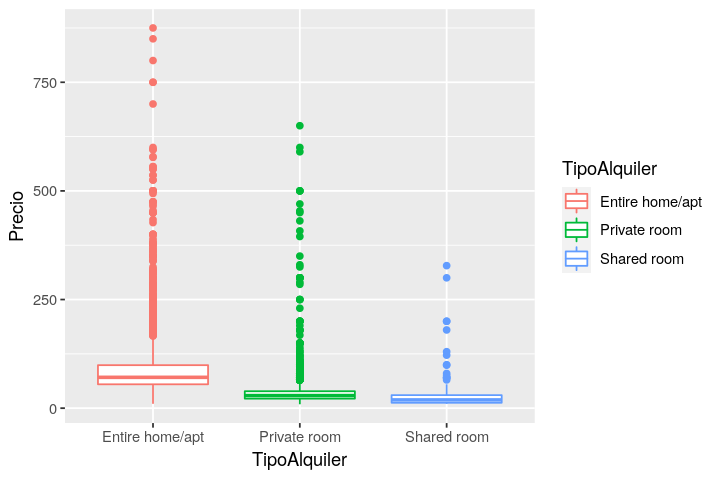

In [1240]:
cleanplot<-na.omit(airbnb[c('Precio','TipoAlquiler')])

p<-ggplot(cleanplot)
p+geom_boxplot(aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))

Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [1241]:
premediotipo<- aggregate(Precio~TipoAlquiler, cleanplot, FUN=mean)

premediotipo

shapiro.test(premediotipo$Precio)

'Entire'
Entire<-cleanplot[cleanplot$TipoAlquiler == "Entire home/apt", 'Precio']
maxEntire<- sample(Entire, 5000, replace=FALSE)
shapiro.test(maxEntire)
'Private'
Private<-cleanplot[cleanplot$TipoAlquiler == "Private room", 'Precio']
maxPrivate<- sample(Private, 5000, replace=FALSE)
shapiro.test(maxPrivate)
'Shared'
Shared<-cleanplot[cleanplot$TipoAlquiler == "Shared room", 'Precio']
shapiro.test(Shared)

'No se cumple la normalidad segun el test de shapiro, se utilizara el test de kruskal'

kruskal.test( Precio ~ TipoAlquiler, data=cleanplot)

pairwise.wilcox.test(cleanplot$Precio, cleanplot$TipoAlquiler,p.adjust.method = "holm")

paste('Por el resultado del test se puede ver que hay una diferencia estadísticamente significativa entre los tipos de alquiler' )

TipoAlquiler,Precio
<fct>,<dbl>
Entire home/apt,87.29661
Private room,34.25514
Shared room,29.85340



	Shapiro-Wilk normality test

data:  premediotipo$Precio
W = 0.80711, p-value = 0.1316


[1] "Entire"


	Shapiro-Wilk normality test

data:  maxEntire
W = 0.67451, p-value < 2.2e-16


[1] "Private"


	Shapiro-Wilk normality test

data:  maxPrivate
W = 0.38434, p-value < 2.2e-16


[1] "Shared"


	Shapiro-Wilk normality test

data:  Shared
W = 0.4436, p-value < 2.2e-16


[1] "No se cumple la normalidad segun el test de shapiro, se utilizara el test de kruskal"


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  cleanplot$Precio and cleanplot$TipoAlquiler 

             Entire home/apt Private room
Private room <2e-16          -           
Shared room  <2e-16          <2e-16      

P value adjustment method: holm 

[1] "Por el resultado del test se puede ver que hay una diferencia estadísticamente significativa entre los tipos de alquiler"

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [1242]:
airbnb_entire<-filter(airbnb, TipoAlquiler == 'Entire home/apt')
head(airbnb_entire)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
1,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
2,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
3,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
4,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.98181
5,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
6,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA


¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

In [1243]:
topbarrio<-sort(table(airbnb_entire$Barrio),decreasing=TRUE)

'Top 5 barrios con mas apartamentos enteros'
head(topbarrio,5)

[1] "Top 5 barrios con mas apartamentos enteros"


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [1244]:
top_price<- aggregate(Precio~Barrio, airbnb_entire,mean,na.rm=TRUE )
colnames(top_price)<-c('Barrio','PrecioMedio')

head(top_price[order(-top_price$PrecioMedio),],5)


,Barrio,PrecioMedio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [1245]:
barrioFreq<-count(airbnb_entire, Barrio, sort = TRUE)

colnames(barrioFreq)<-c('Barrio','Freq')

dfBarrio<-merge(top_price,barrioFreq, by='Barrio',all.x=TRUE)


dfBarrio<-dfBarrio[order(-dfBarrio$PrecioMedio),]

head(dfBarrio,5)

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
77,Palomas,309.7500,4
50,Fuentelareina,180.0000,2
93,Recoletos,161.9254,135
43,El Plantío,150.0000,1
30,Castellana,141.3889,73


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [1246]:
dfBarrio%>%filter(Freq>100)%>%arrange(desc(PrecioMedio))->dfBarrio
dfBarrio<-head(dfBarrio,5)
dfBarrio

,Barrio,PrecioMedio,Freq
,<fct>,<dbl>,<int>
1,Recoletos,161.92537,135
2,Goya,111.33803,142
3,Sol,100.75036,701
4,Trafalgar,98.57848,223
5,Justicia,98.25468,534


Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

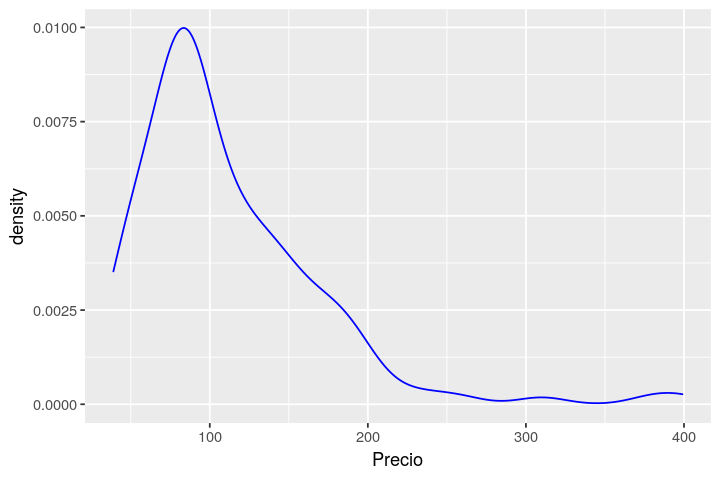

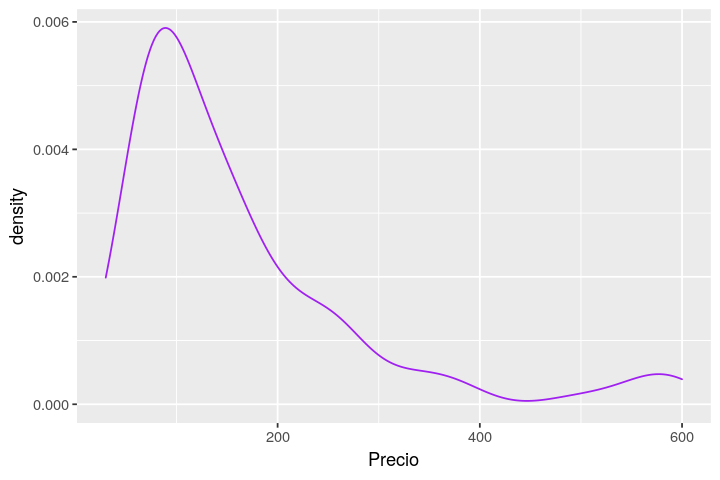

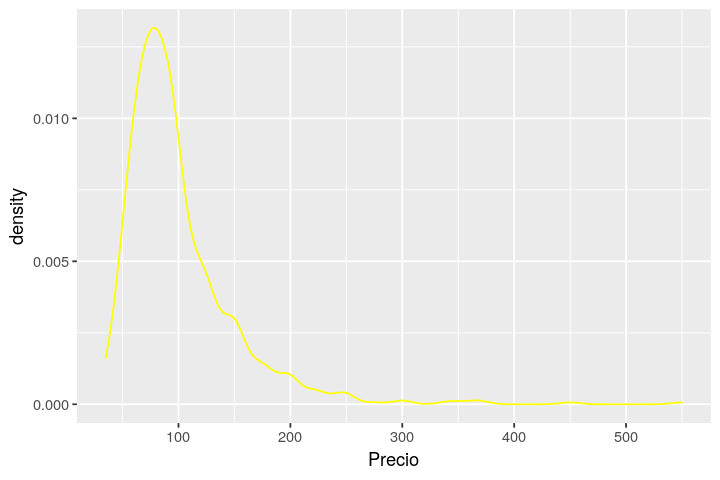

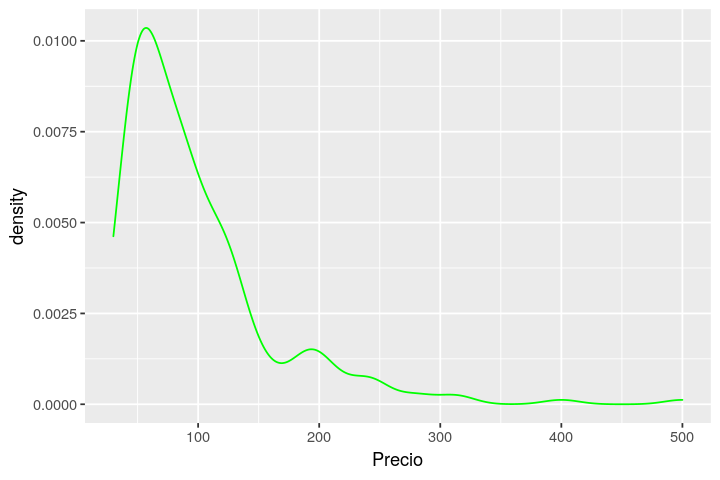

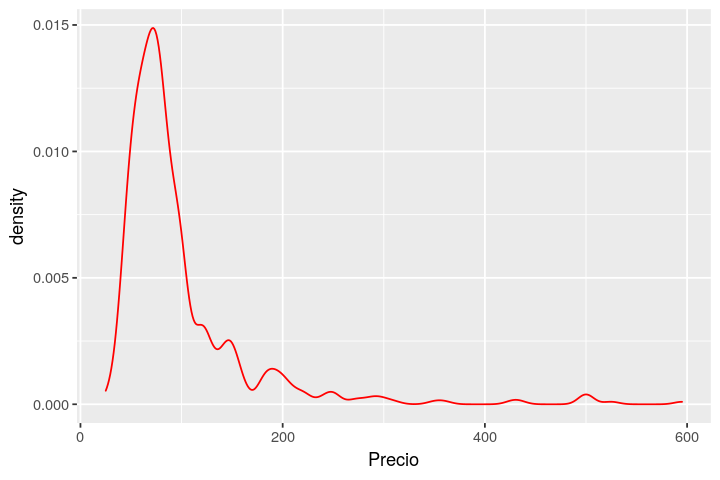

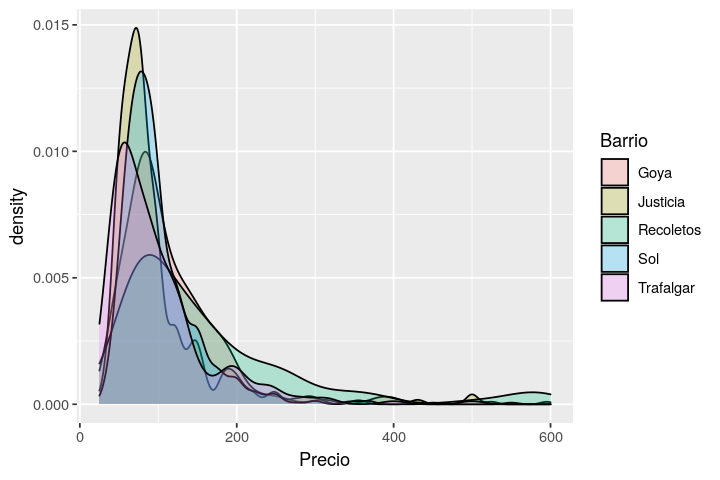

In [1247]:
precios<- airbnb_entire[c("Precio", "Barrio")]

dfb1<-merge(dfBarrio,precios, by='Barrio', all.x=TRUE)

na.omit(dfb1)->dfb

dfb[dfb$Barrio=='Recoletos',]->Recoletos
dfb[dfb$Barrio=="Goya",]->Goya
dfb[dfb$Barrio=='Justicia',]->Justicia
dfb[dfb$Barrio=='Recoletos',]->Recoletos
dfb[dfb$Barrio=='Sol',]->Sol
dfb[dfb$Barrio=='Trafalgar',]->Trafalgar



ggplot(Goya, aes(x= Precio, )) +
  geom_density(color='BLUE')
ggplot(Recoletos, aes(x = Precio)) +
  geom_density(color='purple')
ggplot(Sol, aes(x = Precio)) +
  geom_density(color='yellow')
ggplot(Trafalgar, aes(x = Precio)) +
  geom_density(color='green')
ggplot(Justicia, aes(x = Precio)) +
  geom_density(color='red')

ggplot(dfb, aes(x= Precio, fill=Barrio)) +
  geom_density(alpha=0.25)

Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [1250]:
mediametros<- aggregate(MetrosCuadrados~Barrio, airbnb_entire,mean,na.rm=TRUE )
colnames(mediametros)<-c('Barrio','MediaMetrosCuadrados')
dfmetros<- merge(dfBarrio,mediametros, by='Barrio',all.x=TRUE)
dfmetros

Barrio,PrecioMedio,Freq,MediaMetrosCuadrados
<fct>,<dbl>,<int>,<dbl>
Goya,111.33803,142,51.68504
Justicia,98.25468,534,28.52669
Recoletos,161.92537,135,26.66316
Sol,100.75036,701,45.61692
Trafalgar,98.57848,223,29.30426


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

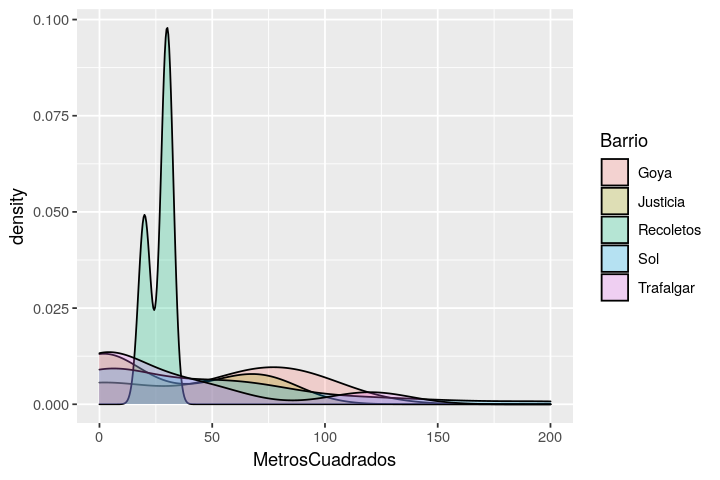

In [1249]:
mmetros<-airbnb_entire[c("MetrosCuadrados", "Barrio")]

dfm<-merge(dfBarrio,mmetros, by='Barrio', all.x=TRUE)

dfm1<-na.omit(dfm)

ggplot(dfm1, aes(x= MetrosCuadrados, fill=Barrio)) +
  geom_density(alpha=0.25)

Esta claro que las medias de metros cuadrados de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [1264]:
kruskal.test(MediaMetrosCuadrados ~ Barrio, data=dfmetros)

kruskal.test(MetrosCuadrados ~ Barrio, data=dfm1)


print("La diferencia no es estadisticamente significativa")


	Kruskal-Wallis rank sum test

data:  MediaMetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 4, df = 4, p-value = 0.406



	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


[1] "La diferencia no es estadisticamente significativa"


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [1121]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [958]:
calcular<-barrio_sol %>% select(c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados"))
calcular2<-barrio_sol %>% select(c("NumBanyos", "NumDormitorios", "MaxOcupantes", "MetrosCuadrados"))%>% drop_na(MetrosCuadrados)
cor(calcular)

'sin NA en MetrosCuadrados'

cor(calcular2)


,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,NA
NumDormitorios,0.6761906,1.0000000,0.7594598,NA
MaxOcupantes,0.6578162,0.7594598,1.0000000,NA
MetrosCuadrados,NA,NA,NA,1


[1] "sin NA en MetrosCuadrados"

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6873719,0.7017290,0.4820549
NumDormitorios,0.6873719,1.0000000,0.7853809,0.5684521
MaxOcupantes,0.7017290,0.7853809,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


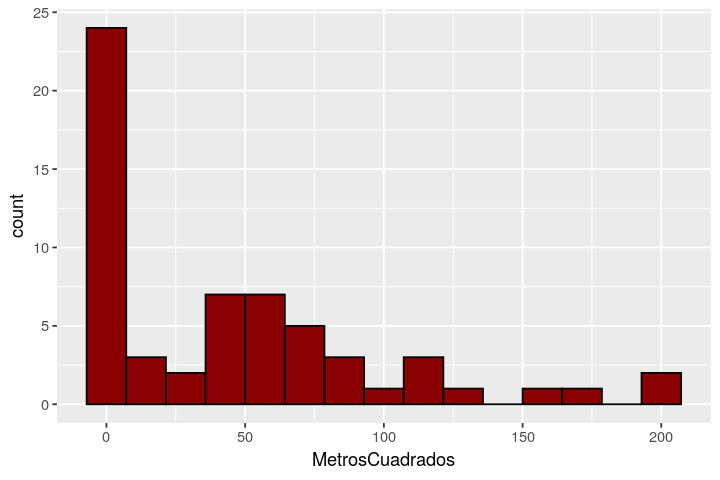

[1] "No son de fiar por tener muchos valores a 0"

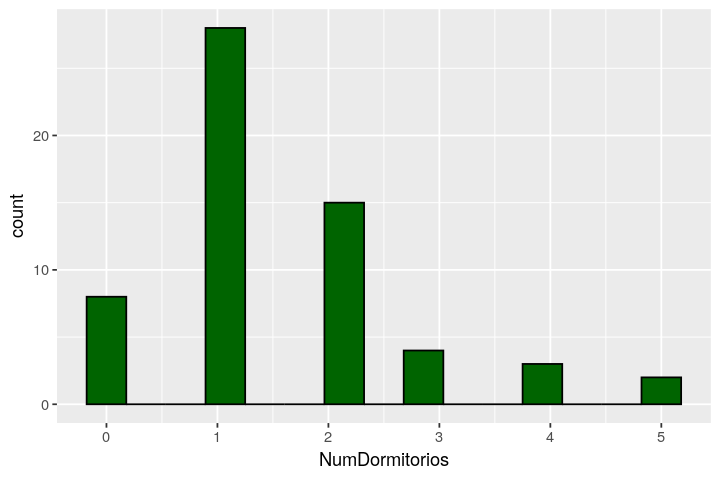

In [959]:
barrio_sol%>%drop_na(MetrosCuadrados)->barrio_sol

nd<-ggplot(barrio_sol, aes(x=NumDormitorios)) + 
  geom_histogram(color="black", fill="darkgreen", bins=15)
mc<-ggplot(barrio_sol,aes(x=MetrosCuadrados)) +
         geom_histogram(color='black',fill='darkred',bins=15)
mc
nd

'No son de fiar por tener muchos valores a 0'

Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

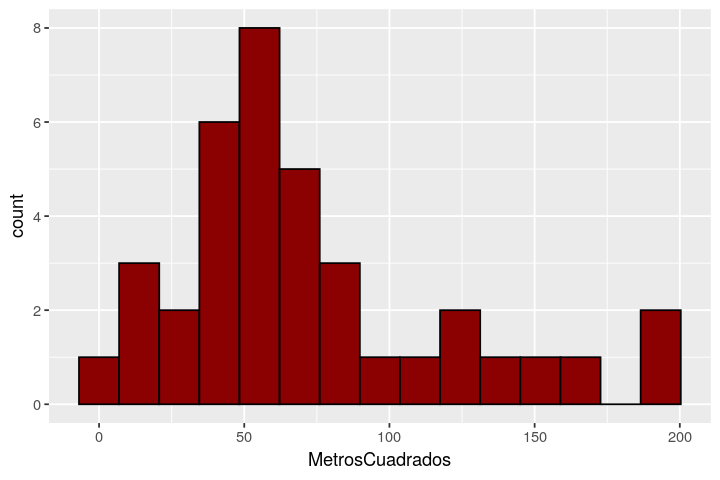

In [965]:
sol_clean<-barrio_sol%>%filter(MetrosCuadrados > 6)
md<-ggplot(sol_clean,aes(x=MetrosCuadrados)) +
         geom_histogram(color='black',fill='darkred',bins=15)
md

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [971]:
var<-lm(data= sol_clean, formula=Precio ~ NumDormitorios+MetrosCuadrados)
var
summary(var)

'la variable mas fiable para conocer el precio del inmueble es el numero de dormitorios '


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = sol_clean)

Coefficients:
    (Intercept)   NumDormitorios  MetrosCuadrados  
        33.9407          31.3626           0.2684  



Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = sol_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.036 -14.664  -5.048  16.506  68.979 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      33.9407     9.0411   3.754 0.000651 ***
NumDormitorios   31.3626     6.2709   5.001 1.71e-05 ***
MetrosCuadrados   0.2684     0.1645   1.631 0.112031    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 29.86 on 34 degrees of freedom
Multiple R-squared:  0.7541,	Adjusted R-squared:  0.7396 
F-statistic: 52.12 on 2 and 34 DF,  p-value: 4.405e-11


[1] "la variable mas fiable para conocer el precio del inmueble es el numero de dormitorios "

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [978]:
varm2<- lm(sol_clean, formula=Precio~MetrosCuadrados)
confint(varm2, level=0.95)

,2.5 %,97.5 %
(Intercept),14.5334222,61.981900
MetrosCuadrados,0.6419612,1.182164


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [1028]:
varm3<- lm(sol_clean, formula=Precio~NumDormitorios)
confint(varm3, level=0.90)
summary(varm3)

''

,5 %,95 %
(Intercept),26.50337,54.50496
NumDormitorios,32.61242,46.12023



Call:
lm(formula = Precio ~ NumDormitorios, data = sol_clean)

Residuals:
   Min     1Q Median     3Q    Max 
-88.34 -17.24  -4.87  20.13  62.66 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      40.504      8.287   4.888 2.25e-05 ***
NumDormitorios   39.366      3.997   9.848 1.26e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.56 on 35 degrees of freedom
Multiple R-squared:  0.7348,	Adjusted R-squared:  0.7272 
F-statistic: 96.98 on 1 and 35 DF,  p-value: 1.264e-11


¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [1196]:
barrio_sol1<-subset(airbnb_entire,Barrio=="Sol")

sol3Dorm <- mutate(barrio_sol1, TripleHab = (NumDormitorios == 3 ))
sol3Dorm <- mutate(sol3Dorm, Sol = (Barrio == "Sol"))
levels(droplevels(sol3Dorm))
nrowbarrio<- nrow(barrio_sol1)

nrow3dorm<- nrow(sol3dorm1)

nrowbarrio
sol3Dorm

NULL

[1] 701

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados,TripleHab,Sol
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>,<lgl>,<lgl>
10,28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,60.01534,FALSE,TRUE
11,28013,Sol,Condominium,Entire home/apt,6,1,2,3,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron",NA,130,100,NA,FALSE,TRUE
12,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,100,97,NA,FALSE,TRUE
13,28012,Sol,Apartment,Entire home/apt,6,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,160,95,NA,FALSE,TRUE
14,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Washer,Essentials,Hangers,Hair dryer,translation missing: en.hosting_amenity_50",NA,49,95,NA,FALSE,TRUE
15,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Laptop friendly workspace",NA,70,88,NA,FALSE,TRUE
16,28005,Sol,Apartment,Entire home/apt,10,2,4,7,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Washer,Essentials",NA,210,81,NA,FALSE,TRUE
17,28013,Sol,Apartment,Entire home/apt,6,1,2,4,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,First aid kit,Safety card,Essentials,Shampoo,Hangers,Hair dryer,Iron",NA,120,99,NA,FALSE,TRUE
18,28012,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,50,91,NA,FALSE,TRUE


In [1202]:

sol3Dorm1<- table(sol3Dorm[,c("TripleHab", "Sol")])


propDorm<- prop.table(sol3Dorm1)
propDorm
paste('probabilidad es:',propDorm[2])

binom.test(nrow3dorm,nrowbarrio)


         Sol
TripleHab       TRUE
    FALSE 0.92154066
    TRUE  0.07845934

[1] "probabilidad es: 0.0784593437945792"


	Exact binomial test

data:  nrow3dorm and nrowbarrio
number of successes = 55, number of trials = 701, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.0596506 0.1009033
sample estimates:
probability of success 
            0.07845934 
